# ¿Qué vende un coche?

En este informe se presenta un anális de datos recopilados en los últimos años para determinar qué factores influyen en el precio de un vehículo. Estos datos provienen de los anuncios gratuitos de los vehiculos que se publican en el sitio web Crankshaft List.

Para este análisis, primero se examinan los datos para corregirlos en caso de ser necesario, esto es indagar en busca de valores atípicos y entradas mal escritas para generar datos limpios. Después se observan los parámetros principales y finalmente se obtiene la influencia de los parámetros en el precio.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### Cargar datos

In [4]:
# Cargar el archivo de datos en un DataFrame
car_data = pd.read_csv('../vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [6]:
#información general/resumida sobre el DataFrame
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
#vista previa de los datos
car_data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [8]:
car_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


La información muestra valores ausentes y errores en el tipo de dato de la columna con fechas.

### Conclusiones y siguientes pasos

La información previa muestra que hay valores ausentes en las columnas 'model_year', 'cylinders', 'odometer', 'paint_color' y en 'is_4wd'. En esta ultima columna, faltan más de la mitad de los valores por lo que hay que analizar los valores de esta columna.

Los valores de la columna 'date_posted' no son de tipo fecha; hay que cambiar el tipo de dato

Hay que investigar los valores de las columnas, 'condition', 'fuel', 'transmission', 'type' y 'paint_color'  ya que pueden estar escritos de diferente forma refiriendose a lo mismo.

## Analizar valores de texto repetitivos

Se investigan los valores de las columnas 'is_4wd','model', 'condition', 'fuel', 'transmission', 'type' y 'paint_color'.

In [10]:
for column in ['condition','fuel','transmission','type','paint_color','model']:
    print('valores en la columna',column,':')
    print(car_data[column].sort_values().unique())

valores en la columna condition :
['excellent' 'fair' 'good' 'like new' 'new' 'salvage']
valores en la columna fuel :
['diesel' 'electric' 'gas' 'hybrid' 'other']
valores en la columna transmission :
['automatic' 'manual' 'other']
valores en la columna type :
['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']
valores en la columna paint_color :
['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow' nan]
valores en la columna model :
['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse

No se encuentran textos extraños en la mayoria de las columnas por lo que no se modifican valores con excepción de la columna 'model'. En esta última se estandarizan los valores para mejorar el análisis

## Tratar los valores ausentes y reducir los datos repetitivos

Se corrigen datos repetitivos en columna 'model'

In [13]:
#función para cambiar datos de columna 'model'
def replace_wrong_values(wrong_values, correct_value): 
    for wrong_value in wrong_values:
        car_data['model'] = car_data['model'].replace(wrong_value, correct_value) 

In [14]:
#listas de agrupación
chevrolet =['chevrolet silverado 1500','chevrolet silverado 2500hd','chevrolet silverado 3500hd']
ford_150 = ['ford f150', 'ford f150 supercrew cab xlt']
ford_250 = ['ford f-250 sd','ford f-250 super duty','ford f250','ford f250 super duty']
ford_350 = ['ford f-350 sd','ford f350', 'ford f350 super duty']

#reemplazar valores de listas
replace_wrong_values(chevrolet,'chevrolet silverado')
replace_wrong_values(ford_150,'ford f-150')
replace_wrong_values(ford_250,'ford f-250')
replace_wrong_values(ford_350,'ford f-350')

#reemplazar valores únicos
car_data['model'] = car_data['model'].replace('chevrolet camaro lt coupe 2d', 'chevrolet camaro') 
car_data['model'] = car_data['model'].replace('ford focus se','ford focus')
car_data['model'] = car_data['model'].replace('ford fusion se','ford fusion')
car_data['model'] = car_data['model'].replace('ford mustang gt coupe 2d','ford mustang')
car_data['model'] = car_data['model'].replace('honda civic lx','honda civic')
car_data['model'] = car_data['model'].replace('jeep wrangler unlimited','jeep wrangler')
car_data['model'] = car_data['model'].replace('nissan frontier crew cab sv','nissan frontier')
car_data['model'] = car_data['model'].replace('jeep grand cherokee laredo','jeep grand cherokee')
car_data['model'] = car_data['model'].replace('toyota camry le','toyota camry')

Se analizan las columnas con valores ausentes y se obtienen los porcentajes a modificar

In [16]:
total_values = 51525

for column in ['is_4wd','model_year','cylinders','odometer']:
    print('valores en la columna',column,':')
    print(car_data[column].sort_values().unique())
    
    isna_sum = car_data[column].isna().sum()
    print('El porcentaje de valores ausentes en',column,'es de ', 
          round(isna_sum/total_values*100,2),'%')
    print()
    

print('El porcentaje de valores ausentes en paint_color es de ', 
      round( car_data['paint_color'].isna().sum()/total_values*100,2),'%')

valores en la columna is_4wd :
[ 1. nan]
El porcentaje de valores ausentes en is_4wd es de  50.37 %

valores en la columna model_year :
[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]
El porcentaje de valores ausentes en model_year es de  7.02 %

valores en la columna cylinders :
[ 3.  4.  5.  6.  8. 10. 12. nan]
El porcentaje de valores ausentes en cylinders es de  10.21 %

valores en la columna odometer :
[0.0e+00 1.0e+00 2.0e+00 ... 9.8e+05 9.9e+05     nan]
El porcentaje de valores ausentes en odometer es de  15.32 %

El porcentaje de valores ausentes en paint_color es de  17.99 %


El porcentaje de valores ausentes por columna es significativamente alto por lo cual no se pueden eliminar todas estas filas.

La columna 'is_4wd' unicamente tiene dos valores que son 1 (True) y Nan; por lo que se asume que nan = 0 ó False.

En la columna 'paint_color' se establecen los datos desconocidos como 'unknown'

En las demás columnas no se observan datos extraños.

In [17]:
#Cambiar Nan a 0
car_data['is_4wd'] = car_data['is_4wd'].fillna(0)

#Cambiar valores ausentes a 'unknown'
car_data['paint_color'] = car_data['paint_color'].fillna('unknown')

En la columna 'odometer', se establece como valor representativo la mediana de todas las filas de cada año para llenar los valores ausentes.

En la columna'cylinders' se establece como valor representativo la moda de todas las filas de cada tipo de vehiculo.

En la columna 'model_year' se establecen como valor representativo la moda de todas las filas de cierto rango de millaje.

In [19]:
#Filas donde se desconoce 'model_year' y 'odometer'
useless_rows = car_data[car_data['model_year'].isna() & car_data['odometer'].isna()]['price'].count()
print('Porcentaje de filas sin datos de año de modelo y millaje: ',round(useless_rows/total_values*100,2),'%')

Porcentaje de filas sin datos de año de modelo y millaje:  1.07 %


Los anuncios donde no se sabe el año del modelo ni el millaje no brindan información apta para el analisis. Los datos de 'model_year' se usaran como referencia para llenar 'odometer' y viceversa; asimismo, es un porcentaje bajo de datos por lo que se eliminan.

In [21]:
car_data.drop(car_data[car_data['model_year'].isna() & car_data['odometer'].isna()].index,inplace=True)

In [22]:
car_data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [23]:
#escribir función que obtenga el rango de millaje
def odom_range(odometer):
    if odometer == 0: return 'odom = 0'
    elif odometer <=50000:  return '0 < odom <= 50,000'
    elif odometer <=100000: return '50,000 < odom <= 100,000'
    elif odometer <=150000: return '100,000 < odom <= 150,000'
    elif odometer <=200000: return '150,000 < odom <= 200,000'
    elif odometer <=250000: return '200,000 < odom <= 250,000'
    elif odometer <=300000: return '250,000 < odom <= 300,000'
    elif odometer <=350000: return '300,000 < odom <= 350,000'
    elif odometer <=400000: return '350,000 < odom <= 400,000'
    elif odometer <=450000: return '400,000 < odom <= 450,000'
    elif odometer <=500000: return '450,000 < odom <= 500,000'
    elif odometer <=550000: return '500,000 < odom <= 550,000'
    elif odometer <=600000: return '550,000 < odom <= 600,000'
    elif odometer <=650000: return '600,000 < odom <= 650,000'
    elif odometer <=700000: return '650,000 < odom <= 700,000'
    elif odometer <=750000: return '700,000 < odom <= 750,000'
    elif odometer <=800000: return '750,000 < odom <= 800,000'
    elif odometer <=850000: return '800,000 < odom <= 850,000'
    elif odometer <=900000: return '850,000 < odom <= 900,000'
    else:                   return 'odom > 900,000'
    

#comprobar función
for i in [0,55000,125000,852345,951000]:
    print(odom_range(i))

odom = 0
50,000 < odom <= 100,000
100,000 < odom <= 150,000
850,000 < odom <= 900,000
odom > 900,000


In [24]:
# Crear una nueva columna basada en la función
car_data ['odom_range'] = car_data ['odometer'].apply(odom_range)
#ver nueva columna
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,"100,000 < odom <= 150,000"
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,"50,000 < odom <= 100,000"
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,"100,000 < odom <= 150,000"
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,"odom > 900,000"
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,"50,000 < odom <= 100,000"


In [25]:
odom_median = car_data.groupby('model_year')['odometer'].transform('median') 
car_data['odometer'].fillna(odom_median, inplace=True) 

cyl_mode = car_data.groupby('type')['cylinders'].transform(lambda x: x.mode()[0])
car_data['cylinders'].fillna(cyl_mode, inplace=True) 

model_year_mode = car_data.groupby('odom_range')['model_year'].transform(lambda x: x.mode()[0])
car_data['model_year'].fillna(model_year_mode, inplace=True) 

C:\Users\Lupiz\AppData\Local\Temp\ipykernel_13380\2004009206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['odometer'].fillna(odom_median, inplace=True)
C:\Users\Lupiz\AppData\Local\Temp\ipykernel_13380\2004009206.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [26]:
car_data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
odom_range      0
dtype: int64

In [27]:
#buscar valores ausentes en columna odometer
car_data.query('odometer.isna()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,"odom > 900,000"


In [28]:
#investigar fila
car_data.query('model_year == 1929')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,"odom > 900,000"


Unicamente hay una fila donde el vehiculo es un modelo del año 1929; no hay valores que se tomen como referencia, por lo que se elimina esta fila. 

In [29]:
#eliminar fila
car_data = car_data.dropna(subset=['odometer'])

In [30]:
#verificar cambios
car_data.info()
car_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 50975 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50975 non-null  int64  
 1   model_year    50975 non-null  float64
 2   model         50975 non-null  object 
 3   condition     50975 non-null  object 
 4   cylinders     50975 non-null  float64
 5   fuel          50975 non-null  object 
 6   odometer      50975 non-null  float64
 7   transmission  50975 non-null  object 
 8   type          50975 non-null  object 
 9   paint_color   50975 non-null  object 
 10  is_4wd        50975 non-null  float64
 11  date_posted   50975 non-null  object 
 12  days_listed   50975 non-null  int64  
 13  odom_range    50975 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.8+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,"100,000 < odom <= 150,000"
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,"50,000 < odom <= 100,000"
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,"100,000 < odom <= 150,000"
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,"odom > 900,000"
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,"50,000 < odom <= 100,000"
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,"50,000 < odom <= 100,000"
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,"50,000 < odom <= 100,000"
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,"100,000 < odom <= 150,000"
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,"100,000 < odom <= 150,000"
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,"100,000 < odom <= 150,000"


Se tiene un dataframe sin valores ausentes

## Corregir los tipos de datos

Se modifica el tipo de datos de la columna 'date_posted'

In [33]:
#Se modifica el tipo de la columna 'date_posted' a tipo datetime
car_data['date_posted'] = pd.to_datetime(car_data['date_posted'], format='%Y-%m-%d')

In [34]:
#Se modifica el tipo de la columna 'is_4wd' a tipo booleano
car_data['is_4wd'] = car_data['is_4wd'].astype('bool')

In [35]:
#verificar cambios
car_data.info()
car_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50975 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50975 non-null  int64         
 1   model_year    50975 non-null  float64       
 2   model         50975 non-null  object        
 3   condition     50975 non-null  object        
 4   cylinders     50975 non-null  float64       
 5   fuel          50975 non-null  object        
 6   odometer      50975 non-null  float64       
 7   transmission  50975 non-null  object        
 8   type          50975 non-null  object        
 9   paint_color   50975 non-null  object        
 10  is_4wd        50975 non-null  bool          
 11  date_posted   50975 non-null  datetime64[ns]
 12  days_listed   50975 non-null  int64         
 13  odom_range    50975 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 5.5+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,"100,000 < odom <= 150,000"
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"50,000 < odom <= 100,000"
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"100,000 < odom <= 150,000"
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,"odom > 900,000"
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"50,000 < odom <= 100,000"


## Enriquecer datos

Se agrega información tomada de la misma tabla para para facilitar el análisis.

In [36]:
#se agregan valores de dia de la semana, mes y año para cuando se colocó el anuncio
car_data['day_of_week'] = car_data['date_posted'].dt.weekday
car_data['month'] = car_data['date_posted'].dt.month
car_data['year'] = car_data['date_posted'].dt.year

In [37]:
#se agregan los años del vehículo cuando el anuncio se colocó
car_data['vehicle_age'] = car_data['year']-car_data['model_year']+1

In [38]:
#Se obtiene millaje promedio por vehiculo
car_data['avg_mileage_per_year'] = round( car_data['odometer'] / car_data['vehicle_age'],2 )

En la columna condition, se reemplazan los valores de cadena con una escala numérica:
- nuevo ('new') = 5
- como nuevo ('like new') = 4
- excelente ('excellent') = 3
- bien ('good') = 2
- bastante ('fair') = 1
- para rescate ('salvage') = 0

In [39]:
#Reemplazar los valores de condición con algo que se pueda manipular más fácilmente
cond_dict = {'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}
car_data['condition'] = car_data['condition'].map(cond_dict)

In [40]:
#verificar cambios
car_data.info()
car_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50975 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 50975 non-null  int64         
 1   model_year            50975 non-null  float64       
 2   model                 50975 non-null  object        
 3   condition             50975 non-null  int64         
 4   cylinders             50975 non-null  float64       
 5   fuel                  50975 non-null  object        
 6   odometer              50975 non-null  float64       
 7   transmission          50975 non-null  object        
 8   type                  50975 non-null  object        
 9   paint_color           50975 non-null  object        
 10  is_4wd                50975 non-null  bool          
 11  date_posted           50975 non-null  datetime64[ns]
 12  days_listed           50975 non-null  int64         
 13  odom_range           

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range,day_of_week,month,year,vehicle_age,avg_mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,"100,000 < odom <= 150,000",5,6,2018,8.0,18125.00
1,25500,2014.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"50,000 < odom <= 100,000",4,10,2018,5.0,17741.00
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"100,000 < odom <= 150,000",3,2,2019,7.0,15714.29
3,1500,2003.0,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,"odom > 900,000",4,3,2019,17.0,9493.94
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"50,000 < odom <= 100,000",1,4,2019,3.0,26967.67


## Comprobar datos limpios

Se muestran todos los datos para saber exactamente que se va a utilizar para el análisis.

In [41]:
#información general/resumida sobre el DataFrame
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50975 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 50975 non-null  int64         
 1   model_year            50975 non-null  float64       
 2   model                 50975 non-null  object        
 3   condition             50975 non-null  int64         
 4   cylinders             50975 non-null  float64       
 5   fuel                  50975 non-null  object        
 6   odometer              50975 non-null  float64       
 7   transmission          50975 non-null  object        
 8   type                  50975 non-null  object        
 9   paint_color           50975 non-null  object        
 10  is_4wd                50975 non-null  bool          
 11  date_posted           50975 non-null  datetime64[ns]
 12  days_listed           50975 non-null  int64         
 13  odom_range           

In [42]:
#Muestra de datos
car_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range,day_of_week,month,year,vehicle_age,avg_mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,"100,000 < odom <= 150,000",5,6,2018,8.0,18125.00
1,25500,2014.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"50,000 < odom <= 100,000",4,10,2018,5.0,17741.00
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"100,000 < odom <= 150,000",3,2,2019,7.0,15714.29
3,1500,2003.0,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,"odom > 900,000",4,3,2019,17.0,9493.94
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"50,000 < odom <= 100,000",1,4,2019,3.0,26967.67
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,"50,000 < odom <= 100,000",2,6,2018,5.0,11590.80
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,"50,000 < odom <= 100,000",3,12,2018,4.0,19803.00
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,"100,000 < odom <= 150,000",0,1,2019,7.0,15639.00
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,"100,000 < odom <= 150,000",0,7,2018,7.0,14882.00
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,"100,000 < odom <= 150,000",4,2,2019,12.0,12265.92


## Estudiar parámetros principales

A continuación, se analizan los parámetros principales que son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

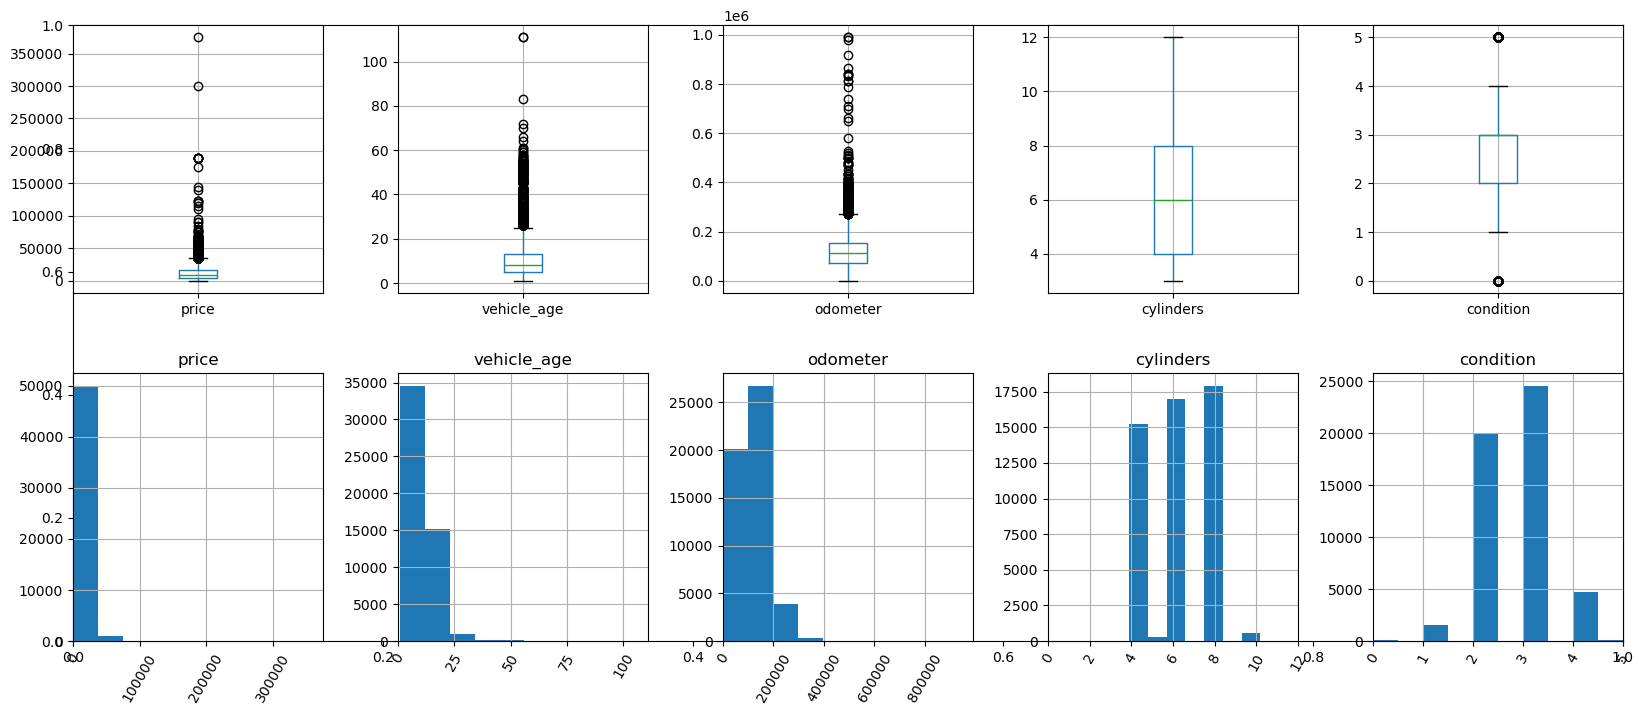

In [44]:
#analizar histograma, boxplot y datos de los parámetros principales
plt.subplots(figsize=(20, 8))

columns = ['price','vehicle_age','odometer','cylinders','condition']

for i, column in enumerate(columns):
    if column =='vehicle_age':
        car_data.query('model_year>0').boxplot(column=column, ax=plt.subplot(2, len(columns), i + 1))
        car_data.query('model_year>0').hist(column, ax=plt.subplot(2, len(columns), len(columns) + i + 1))
    elif column =='cylinders':
        car_data.query('cylinders>0').boxplot(column=column, ax=plt.subplot(2, len(columns), i + 1))
        car_data.query('cylinders>0').hist(column, ax=plt.subplot(2, len(columns), len(columns) + i + 1))
    else:
        car_data.boxplot(column=column, ax=plt.subplot(2, len(columns), i + 1))
        car_data.hist(column, ax=plt.subplot(2, len(columns), len(columns) + i + 1))
        
    plt.xlim(0, max(car_data[column]))
    plt.xticks(rotation=60)

plt.show()


Se observan múltiples valores atípicamente altos en las columnas 'price', 'vehicle_age' y 'odometer'.

In [45]:
#Se analizan a fondo las columnas con valores atípicos
for column in ['price','vehicle_age','odometer']:
    print(column)
    print(car_data[column].describe())
    print()

price
count     50975.000000
mean      12130.817106
std       10042.165686
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64

vehicle_age
count    50975.000000
mean         9.440961
std          6.180972
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: vehicle_age, dtype: float64

odometer
count     50975.000000
mean     115186.066179
std       62387.715502
min           0.000000
25%       73000.000000
50%      113920.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64



In [46]:
car_data.query('price==1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,odom_range,day_of_week,month,year,vehicle_age,avg_mileage_per_year
405,1,2014.0,chevrolet camaro,3,6.0,gas,71310.0,automatic,coupe,unknown,False,2018-07-14,29,"50,000 < odom <= 100,000",5,7,2018,5.0,14262.00
3063,1,1998.0,chevrolet silverado,2,8.0,gas,164000.0,automatic,pickup,unknown,True,2018-10-11,49,"150,000 < odom <= 200,000",3,10,2018,21.0,7809.52
3808,1,2007.0,chevrolet tahoe,2,8.0,gas,200.0,automatic,SUV,red,False,2019-03-18,63,"0 < odom <= 50,000",0,3,2019,13.0,15.38
3902,1,1996.0,ford f-150,1,8.0,gas,163000.0,manual,truck,white,False,2019-02-23,54,"150,000 < odom <= 200,000",5,2,2019,24.0,6791.67
4140,1,2004.0,chevrolet silverado,3,8.0,diesel,83000.0,automatic,pickup,unknown,True,2019-02-04,14,"50,000 < odom <= 100,000",0,2,2019,16.0,5187.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,3,8.0,gas,143000.0,automatic,SUV,black,True,2018-08-06,28,"odom > 900,000",0,8,2018,12.0,11916.67
49709,1,2011.0,ford f-150,3,8.0,gas,139700.0,other,pickup,red,True,2019-03-11,18,"100,000 < odom <= 150,000",0,3,2019,9.0,15522.22
50245,1,1986.0,chevrolet silverado,2,8.0,gas,90420.0,automatic,truck,red,True,2018-11-30,50,"odom > 900,000",4,11,2018,33.0,2740.00
50393,1,2003.0,gmc sierra 2500hd,2,8.0,diesel,212300.0,automatic,pickup,black,True,2019-04-12,28,"200,000 < odom <= 250,000",4,4,2019,17.0,12488.24


Se encuentran carros en excelente estado con precios menores a 10 cosa que no es normal

## Estudiar y tratar valores atípicos

In [48]:
# Determina los límites inferiores para valores atípicos
price_lim_inf = int(car_data['price'].quantile(0.02))
print('límite inferior de precio: ',price_lim_inf)

límite inferior de precio:  371


In [51]:
# Determinar los límites superiores para valores atípicos
price_lim_sup = int(car_data['price'].quantile(.95))
print('límite superior de precio: ',price_lim_sup)

v_age_lim_sup = int(car_data['vehicle_age'].quantile(.95))
print('límite superior de edad del vehículo: ',v_age_lim_sup)

odom_lim_sup = int(car_data['odometer'].quantile(.95))
print('límite superior de millaje: ',odom_lim_sup)

límite superior de precio:  30300
límite superior de edad del vehículo:  20
límite superior de millaje:  217000


In [53]:
#Se obtiene el porcentaje de valores atípicos en las columnas problemáticas
dict = {'price, fijando el límite inferior,':'price< @price_lim_inf',
        'price, fijando el límite superior,': 'price> @price_lim_sup',
        'vehicle_age, fijando el limite superior':'vehicle_age> @v_age_lim_sup',
       'odometer, fijando el límite superior,':'odometer>@odom_lim_sup'}

print('Porcentaje de valores atípicos:')
for key,value in dict.items():
    print('en la columna',key, 'es de',round(car_data.query(value)['price'].count() / total_values *100,2),'%')
    print()

Porcentaje de valores atípicos:
en la columna price, fijando el límite inferior, es de 1.98 %

en la columna price, fijando el límite superior, es de 4.93 %

en la columna vehicle_age, fijando el limite superior es de 4.03 %

en la columna odometer, fijando el límite superior, es de 4.92 %



Los porcentajes de valores atípicos son menores al 5% por lo que se eliminan para mejorar la visualización de los datos.

In [54]:
# Almacena los datos sin valores atípicos en un DataFrame separado
car_data_with_limits = car_data.query('@price_lim_inf < price < @price_lim_sup and vehicle_age < @v_age_lim_sup and odometer<@odom_lim_sup')


## Estudiar parámetros principales sin valores atípicos

A continuación se muestran los datos filtrados sin valores típicos y los originales

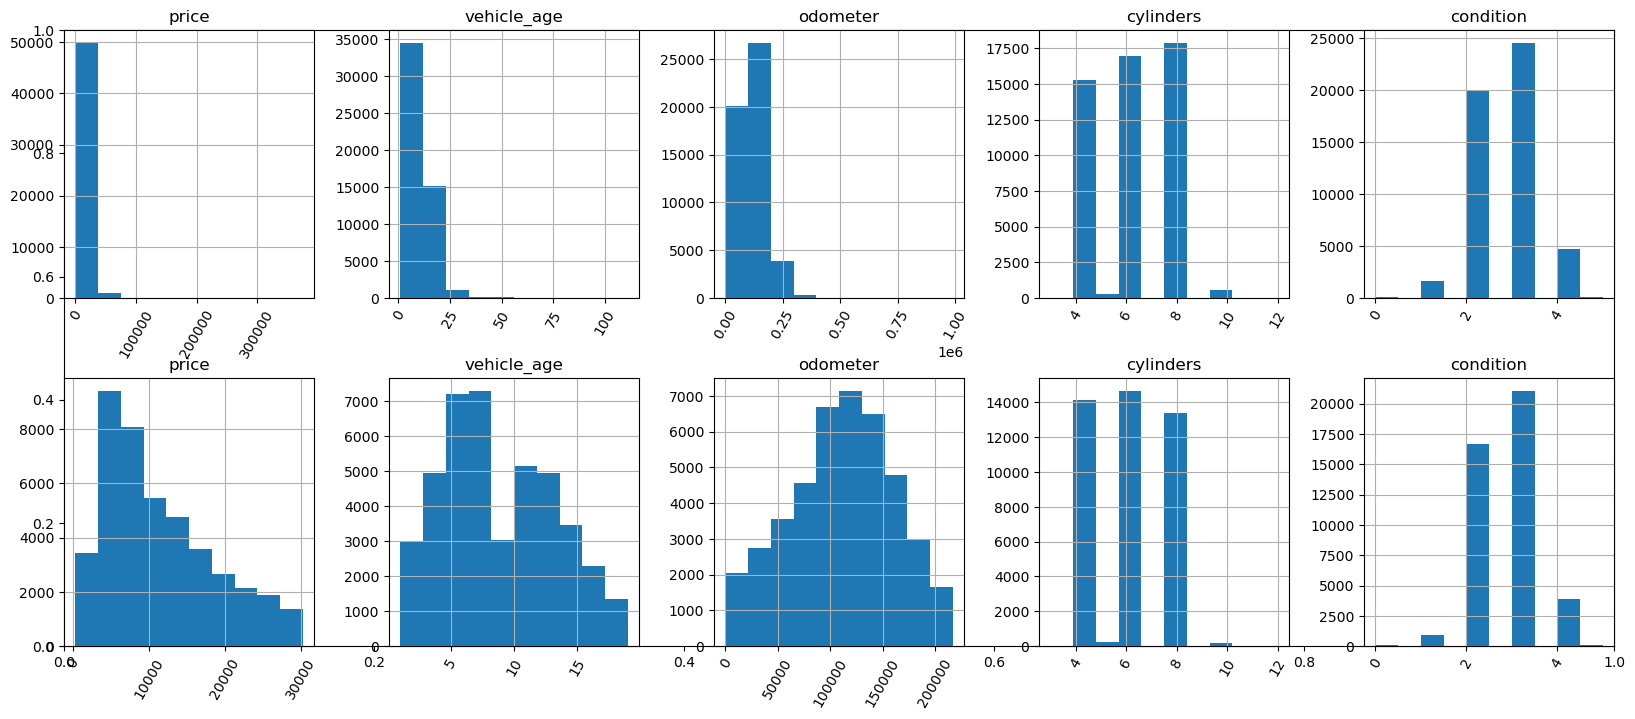

In [55]:
#analizar histograma y datos de los parámetros principales
plt.subplots(figsize=(20, 8))

columns = ['price','vehicle_age','odometer','cylinders','condition']

for i, column in enumerate(columns):
    if column == 'vehicle_age':
            car_data.query('model_year>0').hist(column=column, ax=plt.subplot(2, len(columns), i + 1))
            plt.xticks(rotation=60)
            car_data_with_limits.query('model_year>0').hist(column, ax=plt.subplot(2, len(columns), len(columns) + i + 1))
            plt.xticks(rotation=60)
    elif column =='cylinders':
        car_data.query('cylinders>0').hist(column=column, ax=plt.subplot(2, len(columns), i + 1))
        plt.xticks(rotation=60)
        car_data_with_limits.query('cylinders>0').hist(column, ax=plt.subplot(2, len(columns), len(columns) + i + 1))
        plt.xticks(rotation=60)
    else:
        car_data.hist(column=column, ax=plt.subplot(2, len(columns), i + 1))
        plt.xticks(rotation=60)
        car_data_with_limits.hist(column, ax=plt.subplot(2, len(columns), len(columns) + i + 1))
        plt.xticks(rotation=60)

plt.show()

Al analizar los histogramas de la columna 'price' con los datos originales, los valores atípicos altos dan un histograma con solo una columna muy alta; sin embargo al eliminarlos, se obtiene un histograma donde los precios mayormente son menores a 10,000 y conforme el precio sube, hay menores vehiculos de estos costos.

En la columna 'vechicle_age', con los datos origniales, hay un pico alto entre la edad de 0 a 25 y el resto de la gráfica esta aparentemente vacio por los pocos valores atípicos. Al limpiar los datos, se obtiene una distribución bimodal con un pico en 5 y otro en alrededor de 10.

La columna 'odometer' inicialmente mostraba un histograma limitado. Tras fijar el limite superior, se obtuvo un histograma con distribución normal la cual tiene un pico entre 100,000 y 150,000.

Los datos de las columnas 'cylinders' y 'condition' se mantienen iguales pues los datos originales no muestran valores atípicos que afecten el análisis.

## Periodo de colocación de los anuncios

A continuación de analizan los días en que los anuncios fueron mostrados (columna 'days_listed')

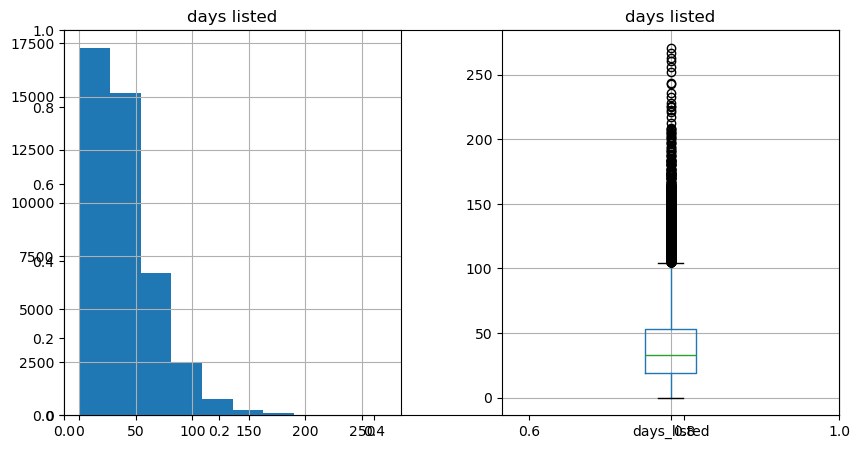

In [56]:
plt.subplots(figsize=(10, 5))
car_data_with_limits.hist('days_listed',ax=plt.subplot(1,2,1))
plt.title('days listed')
car_data_with_limits.boxplot('days_listed',ax=plt.subplot(1,2,2))
plt.title('days listed')
plt.show()

In [57]:
car_data_with_limits['days_listed'].describe()

count    42695.000000
mean        39.542569
std         28.212529
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [58]:
car_data_with_limits['days_listed'].median()

33.0

Como se muestra en las gráficas y datos anteriores, en promedio los anuncios duran 39 días y se tiene una mediana de 33 días.

El periodo de colocación habitual de un anuncio esta entre 0 y 50 días.

A continuación se analizan los anuncios que se eliminaron rápidamente y los que son publicados por un tiempo anormalmente largo.

In [59]:
for filter in ['condition', 'cylinders', 'fuel','transmission']:
    print(car_data_with_limits.query('days_listed>100').groupby(filter)['price'].count())
    print()

condition
0      3
1     24
2    616
3    824
4    142
5      2
Name: price, dtype: int64

cylinders
3.0       2
4.0     537
5.0      10
6.0     537
8.0     519
10.0      6
Name: price, dtype: int64

fuel
diesel      72
gas       1514
hybrid      21
other        4
Name: price, dtype: int64

transmission
automatic    1510
manual         65
other          36
Name: price, dtype: int64



La mayoría de los vehiculos que duraron más de 100 días anunciados tienen la siguientes características:
- tipo de condición 2 y 3 (bien y excelente)
- 4, 6 y 8 cilindros
- tipo de combustible: gas
- automáticos

In [60]:
print('porcentaje de valores atípicos altos: ',round(car_data_with_limits.query('days_listed>100')['price'].count()/total_values*100,2),'%')

porcentaje de valores atípicos altos:  3.13 %


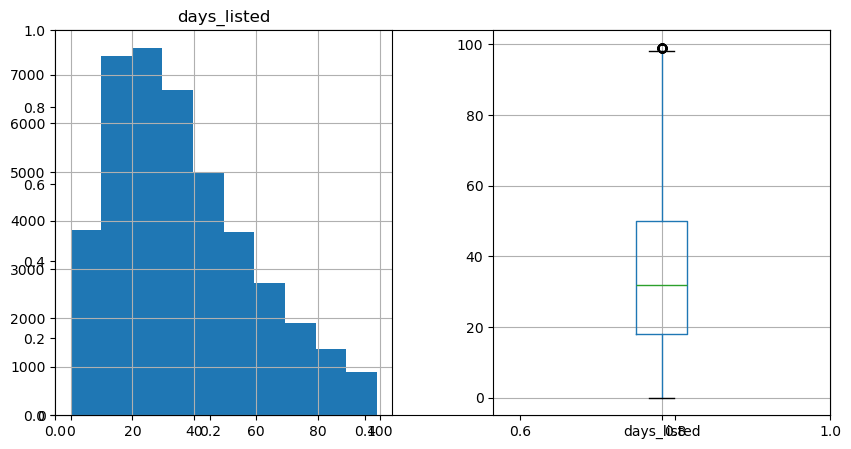

In [61]:
plt.subplots(figsize=(10, 5))
car_data_with_limits.query('days_listed<100').hist('days_listed',ax=plt.subplot(1,2,1))
car_data_with_limits.query('days_listed<100').boxplot('days_listed',ax=plt.subplot(1,2,2))
plt.show()

In [62]:
car_data_with_limits.query('days_listed<100')['days_listed'].describe()

count    41012.00000
mean        36.12077
std         22.51922
min          0.00000
25%         18.00000
50%         32.00000
75%         50.00000
max         99.00000
Name: days_listed, dtype: float64

In [63]:
car_data_with_limits.query('days_listed<100')['days_listed'].median()

32.0

Sin tomar en cuenta los valores atípicamente largos, en promedio los vehiculos duran anunciados un promedio de 36 días con una mediana de 32 días. 

En comparación con los datos anteriores, el promedio bajo 3 días y la mediana 1 día.

## Precio promedio por cada tipo de vehículo

Se analiza el número de anuncios y el precio promedio de cada tipo de vehículo.

In [64]:
car_data_with_limits.pivot_table(index = 'type',values='price',aggfunc=['count','mean'])

,count,mean
,price,price
type,,
SUV,10589,10826.740769
bus,13,25714.615385
convertible,276,13919.605072
coupe,1769,14599.055399
hatchback,955,7068.730890
mini-van,1063,8348.624647
offroad,142,15964.070423
other,210,10462.300000


A continuación, se muestra un gráfico con la cantidad de anuncios en cada tipo de vehículo.

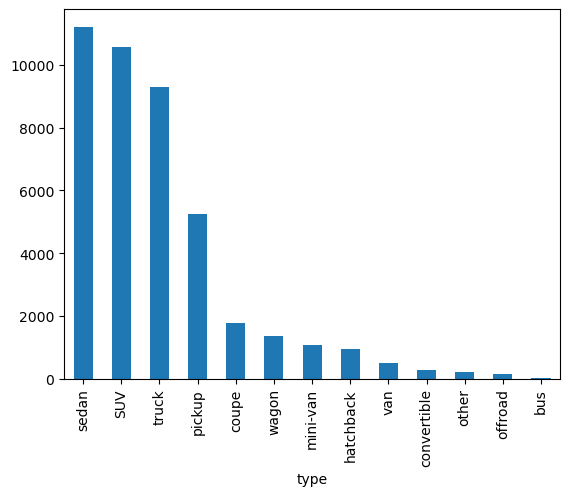

In [65]:
car_data_with_limits.groupby('type').count()['price'].sort_values(ascending=False).plot(kind='bar')
plt.show()

Los 2 tipos de vehiculo con mayor número de anuncios son sedan y SUV.

Les siguen truck, pickup, entre otros con menor número de anuncios.

## Factores de precio

A continuación se analizan distintos factores para ver su impacto en el precio. Para ello se toman como base los 2 tipos con mayor anuncios mostrados en el gráfico anterior que son sedan y SUV.

Los factores a tomar en cuenta son:
- edad
- millaje
- condición
- tipo de transmisión
- color

Para las variables numéricas se crea una matriz de dispersión y para las categoricas graficos de caja.

**Análisis de vehiculo tipo Sedan**

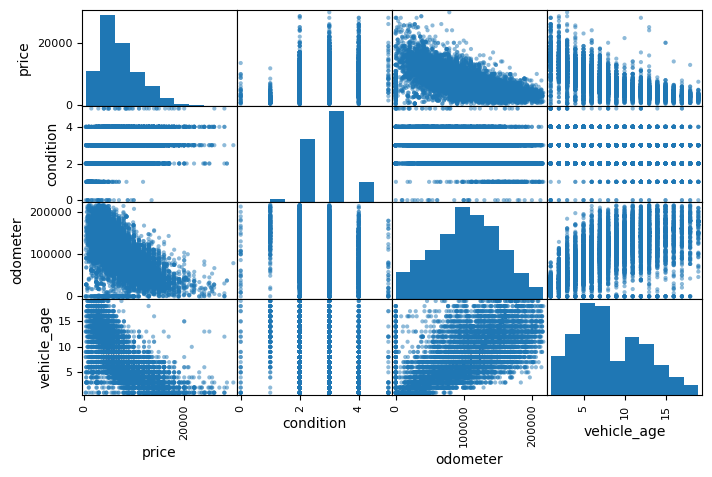

In [67]:
# se analizan: edad, millaje y condición contra el precio del tipo sedan
car_data_with_limits_sedan = car_data_with_limits.query('type == "sedan"')
car_data_with_limits_sedan = car_data_with_limits_sedan.drop(['model_year', 'model', 'cylinders', 'fuel','is_4wd','date_posted',
                        'days_listed','odom_range', 'day_of_week', 'month','year','avg_mileage_per_year'], axis=1)

pd.plotting.scatter_matrix(car_data_with_limits_sedan,figsize=(8,5))
plt.show()

In [69]:
numeric_columns = car_data_with_limits_sedan.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                price  condition  odometer  vehicle_age
price        1.000000   0.310851 -0.626363    -0.694672
condition    0.310851   1.000000 -0.303287    -0.282826
odometer    -0.626363  -0.303287  1.000000     0.639999
vehicle_age -0.694672  -0.282826  0.639999     1.000000


En cuanto al tipo Sedan se observa que:
- en la relación precio contra la condicion del vehiculo, mientras mejor la condición, más alto tiende a ser el precio.
- en la relación precio contra millaje, a mayor millaje, menor es el precio.
- en la relación precio contra edad del vehiculo, a mayor edad, menor es el precio.

In [70]:
car_data_with_limits_sedan.groupby('transmission')['price'].count()

transmission
automatic    10635
manual         515
other           70
Name: price, dtype: int64

Cada tipo de transmisión tiene más de 50 entradas o anuncios, por lo que esta muestra es válida para el análisis.

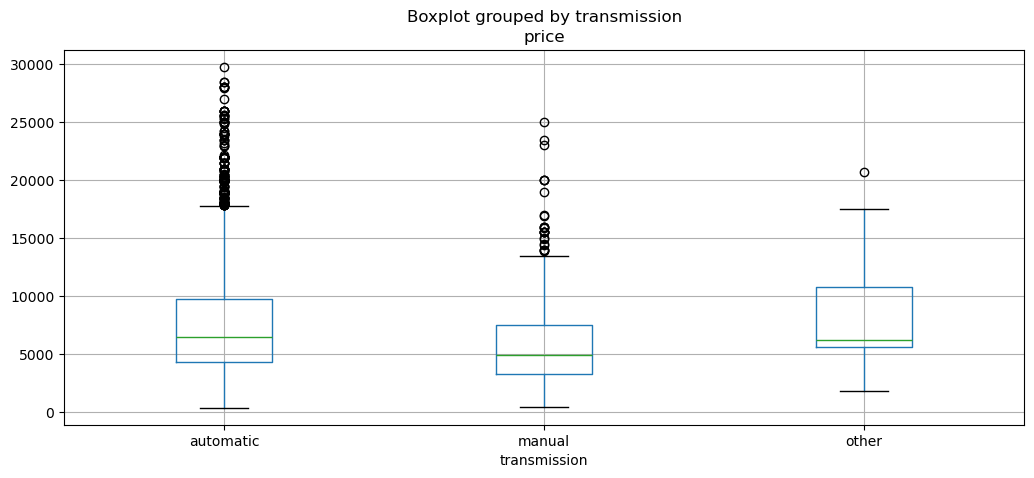

In [71]:
car_data_with_limits_sedan.boxplot(column='price',by='transmission',figsize=(12,5))
plt.show()

Los diagramas de caja anteriores muestran que, en cuanto al tipo de transmición, en promedio los precios son similares sin embargo los vehiculos automaticos tienden a subir más de precio que los demás.

In [72]:
car_data_with_limits_sedan.groupby('paint_color')['price'].count()

paint_color
black      1676
blue       1140
brown       226
custom      248
green       166
grey       1529
orange        9
purple       22
red         864
silver     1918
unknown    2012
white      1391
yellow       19
Name: price, dtype: int64

Los colores naranja, morado y amarillo no pueden tomarse como referencia porque son una muestra muy pequeña. No se toman en cuenta para el analisis del tipo sedan.

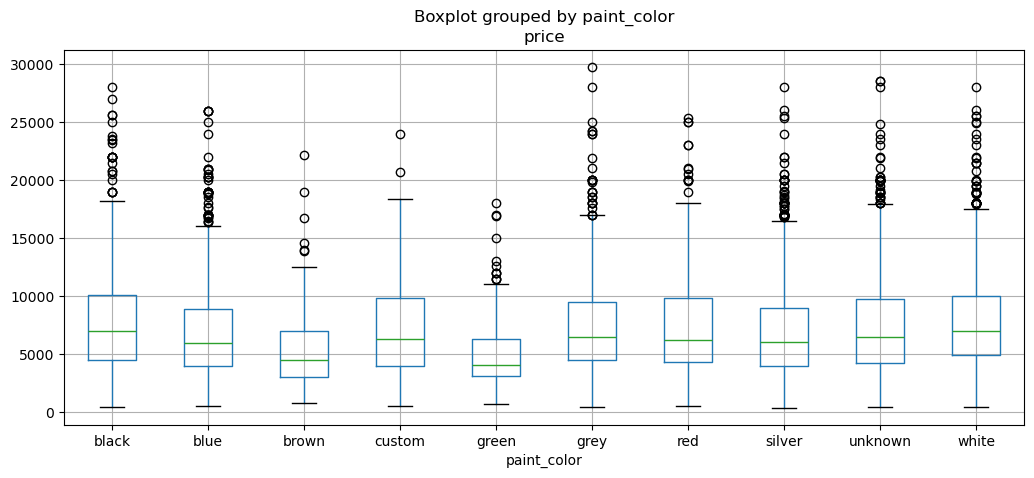

In [73]:
car_data_with_limits_sedan.query('paint_color not in ["orange","purple","yellow"]').boxplot(column='price',by='paint_color',figsize=(12,5))
plt.show()

In [74]:
car_data_with_limits_sedan.query('paint_color not in ["orange","purple","yellow"]').groupby('paint_color')['price'].mean().sort_values(ascending=False)

paint_color
white      7846.470884
black      7757.622912
red        7344.459491
unknown    7303.029821
grey       7283.461086
custom     7259.830645
silver     7103.615746
blue       6841.433333
brown      5530.353982
green      5254.102410
Name: price, dtype: float64

In [75]:
car_data_with_limits_sedan.query('paint_color not in ["orange","purple","yellow"]').groupby('paint_color')['price'].median().sort_values(ascending=False)

paint_color
black      6995.0
white      6995.0
grey       6500.0
unknown    6495.0
custom     6277.5
red        6200.0
silver     5995.0
blue       5939.0
brown      4500.0
green      4050.0
Name: price, dtype: float64

En cuanto a la relación del precio con el color del vehiculo, los colores con tendencia a precio alto son negro, personalizado, gris, rojo y blanco, que tienen el mismo rango; seguidos de los colores azul y plateado y finalmente, los de precio más bajo tienden a ser los cafes y verdes.

**Análisis de vehiculo tipo SUV**

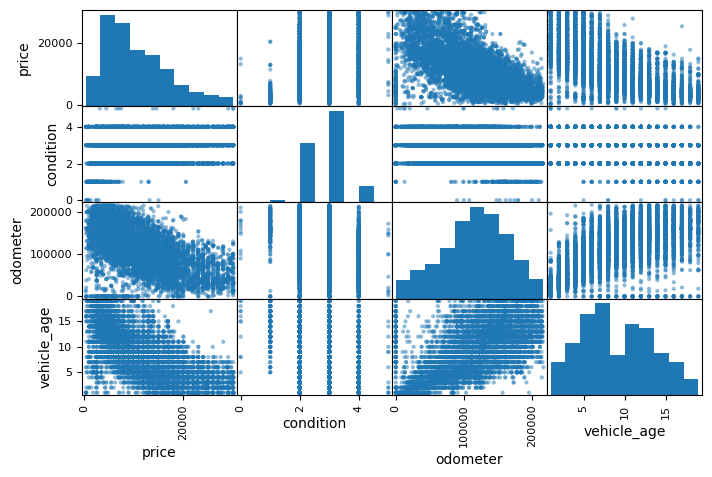

In [76]:
# se analizan: edad, millaje y condición contra el precio del tipo SUV
car_data_with_limits_suv = car_data_with_limits.query('type == "SUV"')
car_data_with_limits_suv = car_data_with_limits_suv.drop(['model_year', 'model', 'cylinders', 'fuel','is_4wd','date_posted',
                        'days_listed', 'odom_range','day_of_week', 'month','year','avg_mileage_per_year'], axis=1)

pd.plotting.scatter_matrix(car_data_with_limits_suv,figsize=(8,5))
plt.show()

In [78]:
numeric_columns_suv = car_data_with_limits_suv.select_dtypes(include=['number'])
correlation_matrix_suv = numeric_columns_suv.corr()
print(correlation_matrix_suv)

                price  condition  odometer  vehicle_age
price        1.000000   0.263642 -0.597280    -0.668164
condition    0.263642   1.000000 -0.277854    -0.266877
odometer    -0.597280  -0.277854  1.000000     0.638681
vehicle_age -0.668164  -0.266877  0.638681     1.000000


En cuanto al tipo SUV se observa que:
- en la relación precio contra la condicion del vehiculo, mientras mejor la condición, más alto tiende a ser el precio.
- en la relación precio contra millaje, a mayor millaje, menor es el precio.
- en la relación precio contra edad del vehiculo, a mayor edad, menor es el precio.

In [79]:
car_data_with_limits_suv.groupby('transmission')['price'].count()

transmission
automatic    10106
manual         395
other           88
Name: price, dtype: int64

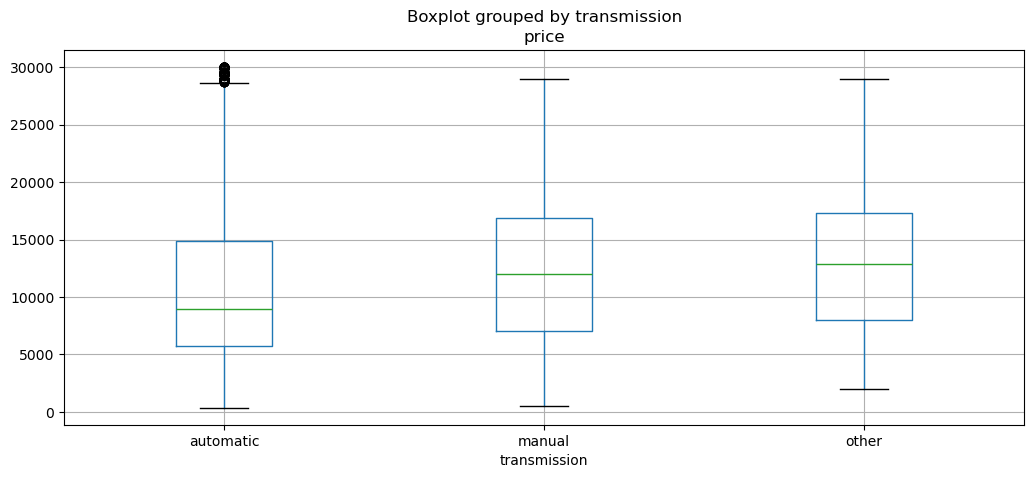

In [80]:
car_data_with_limits_suv.boxplot(column='price',by='transmission',figsize=(12,5))
plt.show()

En el caso de los vehiculos de tipo SUV, los límites superiores del precio son similares mientras que el límite inferior de los de transmisión manual es ligeramente mayor a los automáticos y ambos son menores a otros tipos de transmisión. Al comparar los promedios, sucede lo mismo, el menor es el de los SUVs automáticos, seguidos por los de transmición manual y los del promedio más alto son los otros dos.

In [81]:
car_data_with_limits_suv.groupby('paint_color')['price'].count()

paint_color
black      1861
blue        907
brown       323
custom      251
green       346
grey       1047
orange       80
purple       32
red         761
silver     1385
unknown    1895
white      1662
yellow       39
Name: price, dtype: int64

Los colores morado y amarillo no pueden tomarse como referencia porque son una muestra muy pequeña. No se toman en cuenta para el analisis del tipo SUV.

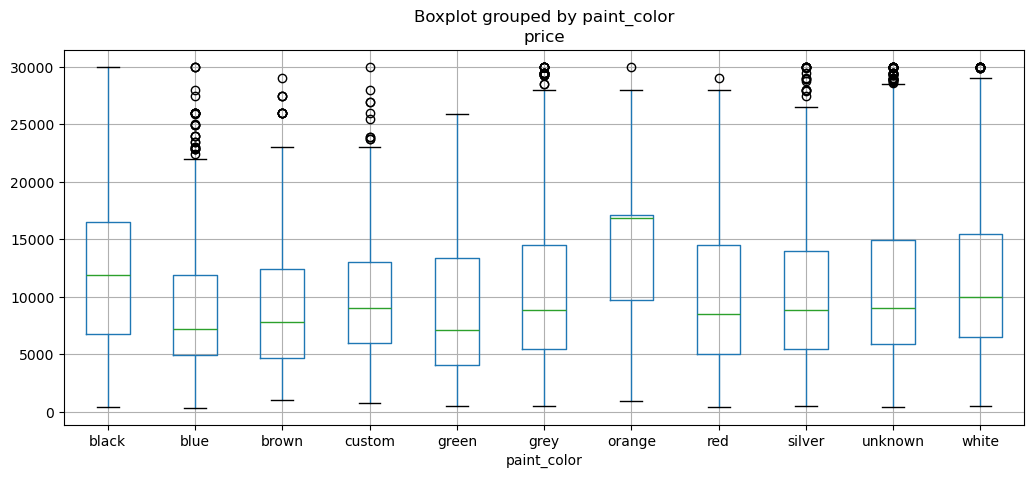

In [82]:
car_data_with_limits_suv.query('paint_color not in ["purple","yellow"]').boxplot(column='price',by='paint_color',figsize=(12,5))
plt.show()

In [83]:
car_data_with_limits_suv.query('paint_color not in ["purple","yellow"]').groupby('paint_color')['price'].mean().sort_values(ascending=False)

paint_color
orange     14917.987500
black      12442.693176
white      11627.404934
unknown    10878.180475
grey       10540.829990
red        10334.670171
silver     10187.156679
custom     10131.438247
green       8955.034682
brown       8849.780186
blue        8811.350606
Name: price, dtype: float64

In [84]:
car_data_with_limits_suv.query('paint_color not in ["purple","yellow"]').groupby('paint_color')['price'].median().sort_values(ascending=False)

paint_color
orange     16900.0
black      11900.0
white       9995.0
unknown     8995.0
custom      8990.0
grey        8900.0
silver      8900.0
red         8500.0
brown       7795.0
blue        7195.0
green       7147.5
Name: price, dtype: float64

Al analizar el precio de los vehiculos SUV tomando en cuenta el color, pareciera que el color negro tiende a ser el más caro; esto tomando en cuenta su limite superior así como su promedio. Sin embargo, al comparar los promedios y las medianas, el color naranja es el de mayor precio. A este color le sigue el negro, entre otros. Los de promedio y mediana más bajos son el verde, cafe y azul.

## Conclusión general

Previo a la realización de este análisis, se tuvieron que modificar valores, eliminar filas con datos incompletos; así como llenar filas con valores representativos. 

- Se estandarizaron datos como el tipo de modelo del vehiculo ya que parece ser una entrada de datos manual y habia filas refiriendose al mismo vechiculo escrito de diferente forma. 

En cuanto a los valores ausentes:
- En la columna 'is_4wd' todos los valores existentes estaban marcados como 1, que representa un True, por lo que se fijaron los ausentes en 0 para representar un False.

- En las columnas 'model_year' y 'cylinders' el 7.02 % y 10.21% de las filas, respectivamente, tenían datos ausentes. Para no eliminar las filas con otros parámetros importantes a considerar, se fijaron estos valores en cero.

- En la columna 'paint_color', se fijaron los valores ausentes, los cuales representan el 17.99% de los datos, como 'unknown' (desconocido). 

- En la columna 'odometer' se optó por usar la mediana de cada decada como un valor representativo para las filas con valores ausentes. 

En cuanto a los valores atípicos, las columnas 'price', 'vehicle_age' y 'odometer' tenían datos altos, los cuales no se tomaron en cuenta para el análisis. Asimismo, a la columna 'price' se le fijo un límite inferior pues había filas con precios extañamente bajos.

**Resultado del análisis**
Tomando como referencia los vehiculos de tipo Sedan y SUV se puede afirmar que, como es de esperarse, el precio de un vehiculo
- tiende a ser más alto mientras mejor sea su condición (coeficientes de 0.31 y 0.26)
- tiende a ser más bajo mientras mayor sea su millaje (coeficientes de -0.62 y -0.59)
- tiende a ser más bajo mientras mayor sea su edad (coeficientes de -0.69 y -0.66)

Los coeficientes de correlación en ambos tipos de vehiculo muestran que el orden de influencia de estos 3 factores es:
1. edad del vehiculo
2. millaje del vehiculo
3. condición del vehiculo


Al comparar los tipos de transmisión en los vehiculos de tipo sedan, al tomar en cuenta los valores atípicos, los automaticos tienden a ser los más caros. Estos y los de otro tipo de transmisión tienen rangos de precio similares mientras que los manuales son los de un rango más barato.

A diferenicia de esto, al analizar los de tipo SUV, los de menor precio tienden a ser los automáticos, seguidos de los manuales y los más caros estan clasificados como otros.

Al comparar los precios tomando en cuenta los colores, en ambos vehiculos el color negro tiende a ser más caro y los más baratos son los verdes y cafes. 
Entre los precios altos del sedan se encuentran los colores negro, personalizado, gris, rojo y blanco, seguidos de azul y plateado y finalmente, los de precio más bajo tienden a ser los cafes y verdes.
Entre los precios altos del SUV estan el negro y naranja y los más bajos son el verde café y azul.